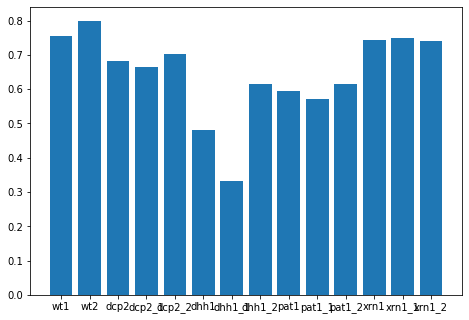

0.7555555555555555 0.8 0.6824224519940916 0.6657894736842105 0.7037037037037037 0.48 0.3333333333333333 0.6153846153846154 0.5957446808510638 0.5714285714285714 0.6153846153846154 0.7444933920704846 0.75 0.7394957983193278


In [1]:
###+Strand TEST(position<5000)###


###TSS_cluster_input
import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']


###+strand single chrom sorting TEST(<5000)

def positive_singlechr_cap_test(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)&(scer['pos']<=5000)]   ###Test range###
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)&(tss_sort_pos['end']<=5000)]  ###Test range###
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap

###+strand all chrom TEST(<5000)

def positive_cap_test(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[positive_singlechr_cap_test(filename,'chrI'),positive_singlechr_cap_test(filename,'chrII'),positive_singlechr_cap_test(filename,'chrIII'),
        positive_singlechr_cap_test(filename,'chrIV'),positive_singlechr_cap_test(filename,'chrIX'),positive_singlechr_cap_test(filename,'chrM'),
        positive_singlechr_cap_test(filename,'chrV'),positive_singlechr_cap_test(filename,'chrVI'),positive_singlechr_cap_test(filename,'chrVII'),
        positive_singlechr_cap_test(filename,'chrVIII'),positive_singlechr_cap_test(filename,'chrX'),positive_singlechr_cap_test(filename,'chrXI'),
        positive_singlechr_cap_test(filename,'chrXII'),positive_singlechr_cap_test(filename,'chrXIII'),positive_singlechr_cap_test(filename,'chrXIV'),
        positive_singlechr_cap_test(filename,'chrXV'),positive_singlechr_cap_test(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap

###+strand capping rate TEST(<5000)
def capping_rate_test(filename):
    df=pd.read_csv(filename,sep='\t')
    cap=0
    uncap=0
    for i,row in positive_cap_test(filename).iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate


###+strand Bar plot Test(<5000)
import matplotlib.pyplot as plt
wt2=capping_rate_test('./Data/Scer.WT.2.tss')
wt1=capping_rate_test('./Data/Scer.WT.1.tss')
dcp2_1=capping_rate_test('./Data/Scer.dcp2.1.tss')
dcp2_2=capping_rate_test('./Data/Scer.dcp2.2.tss')
dcp2=capping_rate_test('./Data/Scer.dcp2.tss')
dhh1_1=capping_rate_test('./Data/Scer.dhh1.1.tss')
dhh1_2=capping_rate_test('./Data/Scer.dhh1.2.tss')
dhh1=capping_rate_test('./Data/Scer.dhh1.tss')
pat1_1=capping_rate_test('./Data/Scer.pat1.1.tss')
pat1_2=capping_rate_test('./Data/Scer.pat1.2.tss')
pat1=capping_rate_test('./Data/Scer.pat1.tss')
xrn1_1=capping_rate_test('./Data/Scer.xrn1.1.tss')
xrn1_2=capping_rate_test('./Data/Scer.xrn1.2.tss')
xrn1=capping_rate_test('./Data/Scer.xrn1.tss')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()
print(wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2)

In [ ]:
###+Strand###

###TSS_cluster_input
import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']


###+strand single chrom sorting

def positive_singlechr_cap(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap

###+strand all chrom

def positive_cap(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[positive_singlechr_cap(filename,'chrI'),positive_singlechr_cap(filename,'chrII'),positive_singlechr_cap(filename,'chrIII'),
        positive_singlechr_cap(filename,'chrIV'),positive_singlechr_cap(filename,'chrIX'),positive_singlechr_cap(filename,'chrM'),
        positive_singlechr_cap(filename,'chrV'),positive_singlechr_cap(filename,'chrVI'),positive_singlechr_cap(filename,'chrVII'),
        positive_singlechr_cap(filename,'chrVIII'),positive_singlechr_cap(filename,'chrX'),positive_singlechr_cap(filename,'chrXI'),
        positive_singlechr_cap(filename,'chrXII'),positive_singlechr_cap(filename,'chrXIII'),positive_singlechr_cap(filename,'chrXIV'),
        positive_singlechr_cap(filename,'chrXV'),positive_singlechr_cap(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap

###+strand cap counting
def capping_rate(filename):
    df=pd.read_csv(filename,sep='\t')
    cap=0
    uncap=0
    for i,row in positive_cap(filename).iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate


###+strand Bar plot Test(<5000)
import matplotlib.pyplot as plt
wt2=capping_rate('./Data/Scer.WT.2.tss')
wt1=capping_rate('./Data/Scer.WT.1.tss')
dcp2_1=capping_rate('./Data/Scer.dcp2.1.tss')
dcp2_2=capping_rate('./Data/Scer.dcp2.2.tss')
dcp2=capping_rate('./Data/Scer.dcp2.tss')
dhh1_1=capping_rate('./Data/Scer.dhh1.1.tss')
dhh1_2=capping_rate('./Data/Scer.dhh1.2.tss')
dhh1=capping_rate('./Data/Scer.dhh1.tss')
pat1_1=capping_rate('./Data/Scer.pat1.1.tss')
pat1_2=capping_rate('./Data/Scer.pat1.2.tss')
pat1=capping_rate('./Data/Scer.pat1.tss')
xrn1_1=capping_rate('./Data/Scer.xrn1.1.tss')
xrn1_2=capping_rate('./Data/Scer.xrn1.2.tss')
xrn1=capping_rate('./Data/Scer.xrn1.tss')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()
print(wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2)

In [ ]:
###-Strand###

###TSS_cluster_input
import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']


###-strand single chrom sorting

def negative_singlechr_cap(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='-')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_neg[(tss_sort_neg['Chr.wt']==chrom)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap

###-strand all chrom

def negative_cap(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[negative_singlechr_cap(filename,'chrI'),negative_singlechr_cap(filename,'chrII'),negative_singlechr_cap(filename,'chrIII'),
        negative_singlechr_cap(filename,'chrIV'),negative_singlechr_cap(filename,'chrIX'),negative_singlechr_cap(filename,'chrM'),
        negative_singlechr_cap(filename,'chrV'),negative_singlechr_cap(filename,'chrVI'),negative_singlechr_cap(filename,'chrVII'),
        negative_singlechr_cap(filename,'chrVIII'),negative_singlechr_cap(filename,'chrX'),negative_singlechr_cap(filename,'chrXI'),
        negative_singlechr_cap(filename,'chrXII'),negative_singlechr_cap(filename,'chrXIII'),negative_singlechr_cap(filename,'chrXIV'),
        negative_singlechr_cap(filename,'chrXV'),negative_singlechr_cap(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap

###-strand cap counting TEST(<5000)
def capping_rate(filename):
    df=pd.read_csv(filename,sep='\t')
    cap=0
    uncap=0
    for i,row in negative_cap(filename).iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate


###-strand Bar plot Test(<5000)
import matplotlib.pyplot as plt
wt2=capping_rate('./Data/Scer.WT.2.tss')
wt1=capping_rate('./Data/Scer.WT.1.tss')
dcp2_1=capping_rate('./Data/Scer.dcp2.1.tss')
dcp2_2=capping_rate('./Data/Scer.dcp2.2.tss')
dcp2=capping_rate('./Data/Scer.dcp2.tss')
dhh1_1=capping_rate('./Data/Scer.dhh1.1.tss')
dhh1_2=capping_rate('./Data/Scer.dhh1.2.tss')
dhh1=capping_rate('./Data/Scer.dhh1.tss')
pat1_1=capping_rate('./Data/Scer.pat1.1.tss')
pat1_2=capping_rate('./Data/Scer.pat1.2.tss')
pat1=capping_rate('./Data/Scer.pat1.tss')
xrn1_1=capping_rate('./Data/Scer.xrn1.1.tss')
xrn1_2=capping_rate('./Data/Scer.xrn1.2.tss')
xrn1=capping_rate('./Data/Scer.xrn1.tss')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()
print(wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2)

In [13]:
import pandas as pd
wt1=pd.read_csv('./Data/list/combine/wt1_id.csv')
wt2=pd.read_csv('./Data/list/combine/wt2_id.csv')
grouped1=wt1.groupby(by='ID')
grouped2=wt2.groupby(by='ID')
grouped2.size()

ID
2       10
3        8
13       4
14      17
15       8
        ..
6972     7
6973    19
6976    36
6984     8
6987    27
Length: 3804, dtype: int64

In [14]:
###TSS_cluster_input

import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']
print(tss_sort_pos)

      TC_ID  Chr.wt     start       end Strand.dcp2 Assigned_gene_name  \
1         2    chrI    9327.0    9373.0           +            YAL066W   
2         3    chrI   11318.0   11343.0           +          YAL064W-B   
12       13    chrI   31108.0   31119.0           +            YAL062W   
13       14    chrI   31188.0   31242.0           +            YAL062W   
14       15    chrI   31519.0   31569.0           +            YAL062W   
...     ...     ...       ...       ...         ...                ...   
6954   6972  chrXVI  931061.0  931124.0           +            YPR196W   
6955   6973  chrXVI  931309.0  931428.0           +            YPR196W   
6958   6976  chrXVI  933979.0  934048.0           +            YPR198W   
6966   6984  chrXVI  939847.0  939924.0           +            YPR201W   
6969   6987  chrXVI  942757.0  942827.0           +            YPR202W   

     in_coding_gene  
1               NaN  
2               NaN  
12              NaN  
13              NaN  
1

In [15]:
###TSS_cluster_input

import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss[tss[['start','end']].isnull().T.any()][['start','end']]


,start,end
13665,NaN,NaN
13666,NaN,NaN
13667,NaN,NaN
13668,NaN,NaN
13669,NaN,NaN
13670,NaN,NaN
13671,NaN,NaN
13672,NaN,NaN
13673,NaN,NaN
13674,NaN,NaN


In [16]:
###Add TC_ID and Asigned gene for single pos chrom
def add_ID(filename,chrom):    
    df=pd.read_csv(filename)
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_chrom['ID']=''
    scer_chrom['Assigned_gene']=''
    for i,row in tss_chrom.iterrows():
        ID=row['TC_ID']
        start=row['start']
        gene=row['Assigned_gene_name']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:
                scer_chrom.loc[j, 'ID'] = ID
                scer_chrom.loc[j, 'Assigned_gene']=gene
    return scer_chrom



In [20]:
###Add TC_ID and Asigned gene for all pos/neg chrom
def positive_addid(filename):
    df=pd.read_csv(filename)
    all=[add_ID(filename,'chrI'),add_ID(filename,'chrII'),add_ID(filename,'chrIII'),
        add_ID(filename,'chrIV'),add_ID(filename,'chrIX'),add_ID(filename,'chrM'),
        add_ID(filename,'chrV'),add_ID(filename,'chrVI'),add_ID(filename,'chrVII'),
        add_ID(filename,'chrVIII'),add_ID(filename,'chrX'),add_ID(filename,'chrXI'),
        add_ID(filename,'chrXII'),add_ID(filename,'chrXIII'),add_ID(filename,'chrXIV'),
        add_ID(filename,'chrXV'),add_ID(filename,'chrXVI')]
    addid=pd.concat(all)
    addid.reset_index(inplace=True, drop=True)
    return addid

wt1_id=positive_addid('./Data/list/combine/pat1_2.csv')
outputpath='./Data/list/combine/ID/p_pat1_2_id.csv'
wt1_id.to_csv(outputpath,sep=',',index=False,header=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
